# NLP Project - Food Reviews

The aim of this project is to create an NLP model with data based on Food Reviews.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, GRU, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

from textblob import TextBlob

from string import punctuation

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('food_review.csv')
df.shape

(40500, 3)

In [3]:
df.head()

,Unnamed: 0,Text,Score
0,0,I bought these from a large chain pet store. a...,1
1,1,"This soup is incredibly good! But honestly, I...",5
2,2,Our family loves these tasty and healthy sesam...,5
3,3,The local auto shop offers this free to it cus...,4
4,4,I brought 2 bottles. One I carry in my pocket...,5


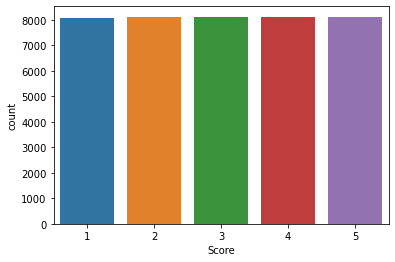

In [4]:
plt.figure()
sns.countplot(df['Score'])
plt.show()

In [5]:
(df['Score'].value_counts()*100)/len(df)

4    20.041975
5    20.014815
3    20.007407
2    19.987654
1    19.948148
Name: Score, dtype: float64

### The data we have is evenly distributed.

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

---

### Function to generate the WordCloud

In [7]:
def word_cloud(n):
    wc = WordCloud(width=800, height=800, stopwords="english", min_font_size=10, background_color="white")
    
    wc.generate("".join(df[df["Score"]==n]["Text"]))
    
    plt.figure(figsize=(7,7))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

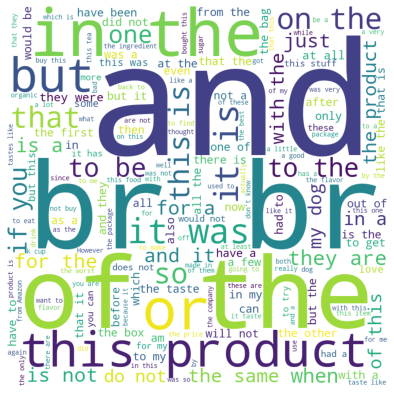

In [8]:
word_cloud(1)

### Now that we can generate a wordcloud, we will clean the text uder df['Text'], and also remove the word 'br' from it.

---

### Function to clean tokens from 'verified_reviews'

In [9]:
def clean_text(text):
    tokens = word_tokenize(WordNetLemmatizer().lemmatize(text.lower()))
    
    clean_tokens = [each for each in tokens if all([each not in bad_tokens, each.isalpha()])]
    return " ".join(clean_tokens)

In [10]:
bad_tokens = list(punctuation) + stopwords.words("english") + ['br']
df["Text"] = df["Text"].apply(clean_text)

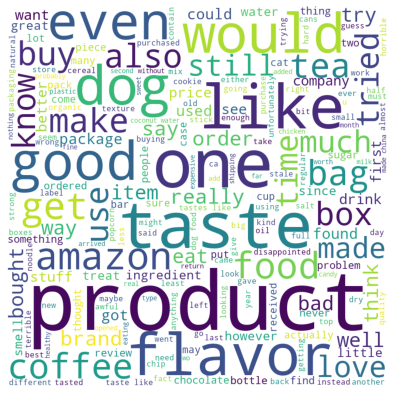

In [11]:
word_cloud(1)

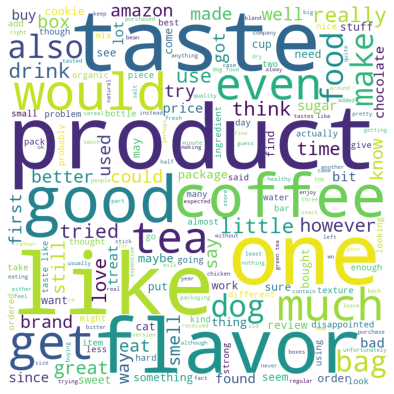

In [12]:
word_cloud(2)

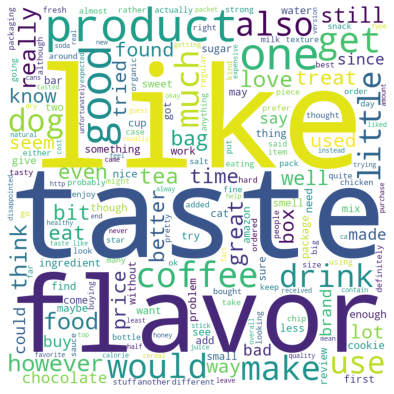

In [13]:
word_cloud(3)

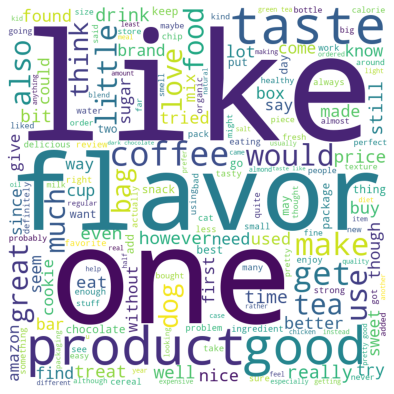

In [14]:
word_cloud(4)

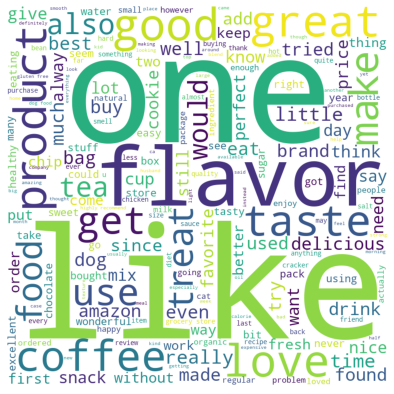

In [15]:
word_cloud(5)

In [16]:
df.head()

,Text,Score
0,bought large chain pet store reading reviews c...,1
1,soup incredibly good honestly looking better d...,5
2,family loves tasty healthy sesame honey almond...,5
3,local auto shop offers free customers tried tw...,4
4,brought bottles one carry pocket home fell lov...,5


---

### Function to clean the text

In [17]:
le = LabelEncoder()

df["Score"] = le.fit_transform(df["Score"])

In [18]:
df.head()

,Text,Score
0,bought large chain pet store reading reviews c...,0
1,soup incredibly good honestly looking better d...,4
2,family loves tasty healthy sesame honey almond...,4
3,local auto shop offers free customers tried tw...,3
4,brought bottles one carry pocket home fell lov...,4


---

In [19]:
X = np.asarray(df['Text'])
y = np.asarray(df['Score'])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Function to perform vectorization

In [21]:
def vectorize(vect):
    X_train_cv = vect.fit_transform(X_train)
    X_test_cv = vect.transform(X_test)
    return X_train_cv, X_test_cv

### Funtion to create an ML model

In [22]:
def ml_model(model, X_train_mod, X_test_mod):
    model.fit(X_train_mod, y_train)
    y_pred = model.predict(X_test_mod)
    print(classification_report(y_test, y_pred))
    return model

In [23]:
X_train_cv, X_test_cv = vectorize(CountVectorizer())

In [24]:
dtc_cv = ml_model(DecisionTreeClassifier(), X_train_cv, X_test_cv)

              precision    recall  f1-score   support

           0       0.52      0.51      0.51      1613
           1       0.39      0.41      0.40      1575
           2       0.40      0.38      0.39      1683
           3       0.38      0.38      0.38      1609
           4       0.48      0.49      0.49      1620

    accuracy                           0.43      8100
   macro avg       0.43      0.43      0.43      8100
weighted avg       0.43      0.43      0.43      8100



In [25]:
rfc_cv = ml_model(RandomForestClassifier(), X_train_cv, X_test_cv)

              precision    recall  f1-score   support

           0       0.58      0.71      0.64      1613
           1       0.53      0.42      0.47      1575
           2       0.52      0.43      0.47      1683
           3       0.50      0.44      0.47      1609
           4       0.57      0.72      0.63      1620

    accuracy                           0.54      8100
   macro avg       0.54      0.54      0.54      8100
weighted avg       0.54      0.54      0.54      8100



In [26]:
logreg_cv = ml_model(LogisticRegression(), X_train_cv, X_test_cv)

              precision    recall  f1-score   support

           0       0.62      0.61      0.61      1613
           1       0.47      0.45      0.46      1575
           2       0.47      0.44      0.45      1683
           3       0.46      0.48      0.47      1609
           4       0.61      0.65      0.63      1620

    accuracy                           0.53      8100
   macro avg       0.53      0.53      0.53      8100
weighted avg       0.53      0.53      0.53      8100



In [27]:
ada_cv = ml_model(AdaBoostClassifier(n_estimators=100), X_train_cv, X_test_cv)

              precision    recall  f1-score   support

           0       0.48      0.62      0.54      1613
           1       0.35      0.27      0.31      1575
           2       0.42      0.28      0.34      1683
           3       0.39      0.42      0.40      1609
           4       0.51      0.60      0.55      1620

    accuracy                           0.44      8100
   macro avg       0.43      0.44      0.43      8100
weighted avg       0.43      0.44      0.43      8100



In [28]:
grad_cv = ml_model(GradientBoostingClassifier(n_estimators=100), X_train_cv, X_test_cv)

              precision    recall  f1-score   support

           0       0.53      0.60      0.56      1613
           1       0.39      0.36      0.38      1575
           2       0.44      0.32      0.37      1683
           3       0.41      0.40      0.41      1609
           4       0.50      0.63      0.55      1620

    accuracy                           0.46      8100
   macro avg       0.45      0.46      0.45      8100
weighted avg       0.45      0.46      0.45      8100



In [29]:
xgb_cv = ml_model(XGBClassifier(n_estimators=200, reg_alpha=1), X_train_cv, X_test_cv)

[21:21:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.61      0.67      0.64      1613
           1       0.47      0.44      0.46      1575
           2       0.48      0.40      0.44      1683
           3       0.47      0.49      0.48      1609
           4       0.60      0.67      0.64      1620

    accuracy                           0.53      8100
   macro avg       0.53      0.53      0.53      8100
weighted avg       0.53      0.53      0.53      8100



___

In [30]:
X_train_tv, X_test_tv = vectorize(TfidfVectorizer())

In [31]:
dtc_tv = ml_model(DecisionTreeClassifier(), X_train_tv, X_test_tv)

              precision    recall  f1-score   support

           0       0.49      0.51      0.50      1613
           1       0.39      0.41      0.40      1575
           2       0.39      0.36      0.38      1683
           3       0.38      0.38      0.38      1609
           4       0.44      0.44      0.44      1620

    accuracy                           0.42      8100
   macro avg       0.42      0.42      0.42      8100
weighted avg       0.42      0.42      0.42      8100



In [32]:
tfc_tv = ml_model(RandomForestClassifier(), X_train_tv, X_test_tv)

              precision    recall  f1-score   support

           0       0.58      0.73      0.64      1613
           1       0.52      0.41      0.46      1575
           2       0.51      0.42      0.46      1683
           3       0.51      0.42      0.46      1609
           4       0.56      0.72      0.63      1620

    accuracy                           0.54      8100
   macro avg       0.53      0.54      0.53      8100
weighted avg       0.53      0.54      0.53      8100



In [33]:
logreg_tv = ml_model(LogisticRegression(), X_train_tv, X_test_tv)

              precision    recall  f1-score   support

           0       0.61      0.67      0.64      1613
           1       0.46      0.43      0.45      1575
           2       0.48      0.41      0.44      1683
           3       0.49      0.49      0.49      1609
           4       0.64      0.69      0.66      1620

    accuracy                           0.54      8100
   macro avg       0.53      0.54      0.54      8100
weighted avg       0.53      0.54      0.54      8100



In [34]:
ada_tv = ml_model(AdaBoostClassifier(n_estimators=100), X_train_tv, X_test_tv)

              precision    recall  f1-score   support

           0       0.48      0.61      0.54      1613
           1       0.35      0.26      0.29      1575
           2       0.39      0.28      0.32      1683
           3       0.38      0.41      0.40      1609
           4       0.50      0.61      0.55      1620

    accuracy                           0.43      8100
   macro avg       0.42      0.43      0.42      8100
weighted avg       0.42      0.43      0.42      8100



In [35]:
grad_tv = ml_model(GradientBoostingClassifier(n_estimators=100), X_train_tv, X_test_tv)

              precision    recall  f1-score   support

           0       0.54      0.59      0.57      1613
           1       0.39      0.38      0.38      1575
           2       0.44      0.33      0.38      1683
           3       0.42      0.41      0.41      1609
           4       0.52      0.62      0.56      1620

    accuracy                           0.47      8100
   macro avg       0.46      0.47      0.46      8100
weighted avg       0.46      0.47      0.46      8100



In [36]:
xgb_tv = ml_model(XGBClassifier(n_estimators=200, reg_alpha=1), X_train_tv, X_test_tv)

[21:26:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.59      0.64      0.62      1613
           1       0.45      0.44      0.45      1575
           2       0.47      0.40      0.44      1683
           3       0.48      0.49      0.48      1609
           4       0.60      0.65      0.62      1620

    accuracy                           0.52      8100
   macro avg       0.52      0.52      0.52      8100
weighted avg       0.52      0.52      0.52      8100



### From the above models, the best predictions were achieved through RandomForest, Logistic, and XGB. This is for both Vectorizers.
### Overall, we would select the RandomForest model.

---

### Creating a new column that will have the count of the number of tokens for each document

In [37]:
sent_len = []

for each in df["Text"]:
    sent_len.append(len(word_tokenize(each)))

df["sent_len"] = sent_len

In [38]:
df.head()

,Text,Score,sent_len
0,bought large chain pet store reading reviews c...,0,20
1,soup incredibly good honestly looking better d...,4,28
2,family loves tasty healthy sesame honey almond...,4,72
3,local auto shop offers free customers tried tw...,3,19
4,brought bottles one carry pocket home fell lov...,4,19


In [39]:
max(sent_len)

897

In [40]:
np.quantile(sent_len, 0.95)

110.0

In [41]:
np.quantile(sent_len, 0.98)

153.0

#### The max number of tokens in a unit is 897. We will ignore 2% of the data. For this, we will set the max length for the model to 153.

In [42]:
max_len = 153

---

#### We will train the data. The unique words from the trained dat will be sequenced (given unique IDs).

In [43]:
le = LabelEncoder()

df["Score"] = le.fit_transform(df["Score"])
df.head()

,Text,Score,sent_len
0,bought large chain pet store reading reviews c...,0,20
1,soup incredibly good honestly looking better d...,4,28
2,family loves tasty healthy sesame honey almond...,4,72
3,local auto shop offers free customers tried tw...,3,19
4,brought bottles one carry pocket home fell lov...,4,19


In [44]:
X = np.asarray(df["Text"])
y = np.asarray(df["Score"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [45]:
tok = Tokenizer()
tok.fit_on_texts(X_train)

In [46]:
# tok.index_word

In [47]:
len(tok.index_word)

29811

In [48]:
vocab_len = len(tok.index_word)

#### Each unit in the document will be converted to a vector

In [49]:
seq_train = tok.texts_to_sequences(X_train)
# seq_train

#### We will now perform PADDING

In [50]:
sequence_matrix_train = sequence.pad_sequences(seq_train, maxlen=max_len)
sequence_matrix_train

array([[   0,    0,    0, ...,  787,  405, 1366],
       [   0,    0,    0, ..., 1281,  384,  178],
       [   0,    0,    0, ..., 1351,   20,  259],
       ...,
       [   0,    0,    0, ...,   22, 1695, 1008],
       [   0,    0,    0, ...,   78,  826,  616],
       [   0,    0,    0, ...,  330,  463,  173]], dtype=int32)

#### Function to create the model

In [51]:
def food_model(arch, nodes, ep, bs):
    model = Sequential()
    model.add(Embedding(vocab_len+1, 1000, input_length=max_len, mask_zero=True, input_shape=(sequence_matrix_train.shape[1],)))
    
    model.add(arch(nodes[0], activation="tanh"))
    
    for i in range(len(nodes)):
        model.add(Dense(nodes[i], activation="relu"))
        model.add(Dropout(0.2))
    
    model.add(Dense(5, activation="softmax"))
    
    model.summary()
    
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")
    model.fit(sequence_matrix_train, y_train, epochs=ep, batch_size=bs)
    
    y_pred = model.predict(sequence.pad_sequences(tok.texts_to_sequences(X_test), maxlen=max_len))
    y_pred = y_pred.argmax(axis=1)
    print(classification_report(y_test, y_pred))

In [52]:
food_model(SimpleRNN, [32,16], 50, 50)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 153, 1000)         29812000  
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                33056     
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 8

In [53]:
food_model(LSTM, [32,16], 50, 50)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 153, 1000)         29812000  
_________________________________________________________________
lstm (LSTM)                  (None, 32)                132224    
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

In [54]:
food_model(GRU, [32,16], 50, 50)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 153, 1000)         29812000  
_________________________________________________________________
gru (GRU)                    (None, 32)                99264     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 5)                

---

# Conclusion

The goal of this project was to create an NLP model based on Food Reviews. In order to achieve this, a few Machine Learning (ML) models were initially built, and then Neural Network (NN) models. Overall, better accuracy scores were achieved with the ML model.

## Version 1.0
Here, focus on put on cleaning the text of the data (removing stopwords), and creating a NN model. 

## Version 2.0
We tried to see if we could better our score by create ML models, and it turns out that the accuracy score did improve by 0.04. Any small increase in score create a better model, thus improving overall business.

## Version 3.0
Some data analysis was performed to see the top rated Anime, and those with the most numbe of members.

---
---